In [3]:
import tensorflow as tf
import os
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
batchSize = 32

In [5]:
train_path = '../data2/foo/main_data_test2/train/'
test_path = '../data2/foo/main_data_test2/test/'
val_path = '../data2/foo/main_data_test2/valid/'

In [6]:
image_generator = ImageDataGenerator(
       rescale=1/255,
       horizontal_flip=True,
       zoom_range=0.2,
       # rescale=1./255,             
       # rotation_range=20,          
       # width_shift_range=0.2,     
       # height_shift_range=0.2,     
       # shear_range=0.2,            
)
train_dataset = image_generator.flow_from_directory(
       train_path,
       batch_size=batchSize,
       shuffle=True,
       target_size=(224,224),
       class_mode='categorical'
)
validation_dataset = image_generator.flow_from_directory(
       val_path,
       batch_size=batchSize,
       shuffle=True,
       target_size=(224,224),
       class_mode='categorical'
)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [7]:
category_names = os.listdir(train_path)
category_names

['hammer', 'plirs', 'rope', 'screwdriver', 'wrench']

In [8]:
img_shape = (224,224,3)
num_cat = len(category_names)

In [9]:
base_model = tf.keras.applications.VGG19(input_shape=img_shape,include_top=False,weights='./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')
base_model.trainable=False
# for layer in base_model.layers[-5:]:
#     layer.trainable = True
model = tf.keras.Sequential([
       base_model,
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dropout(0.2),
       # tf.keras.layers.Dropout(0.4),
       # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # اضافه کردن L2 regularization
       # tf.keras.layers.Dropout(0.5),

       tf.keras.layers.Dense(128,activation='relu'),
       tf.keras.layers.Dense(num_cat,activation='softmax')
])
model._name = 'Air_VGG19'
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,236,421 (88.64 MB)

 Trainable params: 3,212,037 (12.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
history = model.fit(
       train_dataset,
       epochs=50,
       validation_data=validation_dataset,
       verbose=1
)
# history = model.fit(
#        train_dataset,
#        epochs=30,
#        validation_data=validation_dataset,
#        verbose=1
# )

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3455 - loss: 1.4982 - val_accuracy: 0.6800 - val_loss: 0.9936
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7674 - loss: 0.8258 - val_accuracy: 0.8000 - val_loss: 0.5911
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8426 - loss: 0.4982 - val_accuracy: 0.8800 - val_loss: 0.4932
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9089 - loss: 0.3192 - val_accuracy: 0.9200 - val_loss: 0.3481
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9414 - loss: 0.2414 - val_accuracy: 0.9000 - val_loss: 0.3045
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9841 - loss: 0.1396 - val_accuracy: 0.9000 - val_loss: 0.2438
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9799 - loss: 0.1326 - val_accuracy: 0.9400 - val_loss: 0.2572
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9887 - loss: 0.1127 - val_accuracy: 0.9400 - val_loss:

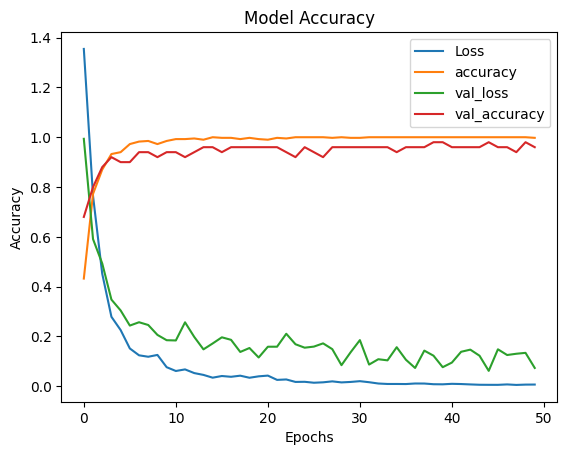

In [95]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Loss','accuracy','val_loss','val_accuracy'])
plt.show()

<mark>Precision:</mark> Measures the number of correct positive predictions divided by the total positive predictions. High precision means fewer false positives.
<br>
<mark>Recall</mark>: Measures the number of correct positive predictions divided by the actual positive instances. High recall means fewer false negatives.
<br>
<mark>AUC (Area Under the ROC Curve):</mark> Indicates how well the model distinguishes between classes. Higher AUC values suggest better performance.
<br>
<mark>F1 Score:</mark> The harmonic mean of precision and recall. It’s useful when there’s an imbalance between classes.

In [31]:
base_model = tf.keras.applications.VGG19(input_shape=img_shape,include_top=False,weights='./vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')
base_model.trainable=False
for layer in base_model.layers[-5:]:
    layer.trainable = True
model = tf.keras.Sequential([
       base_model,
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dropout(0.2),
       # tf.keras.layers.Dropout(0.4),
       tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # اضافه کردن L2 regularization
       # tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(num_cat,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
model.summary()

In [32]:
history = model.fit(
       train_dataset,
       epochs=30,
       validation_data=validation_dataset,
       verbose=1
)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.3644 - auc_7: 0.6760 - loss: 3.9061 - precision_8: 0.6381 - recall_7: 0.1585 - val_accuracy: 0.8600 - val_auc_7: 0.9807 - val_loss: 2.6793 - val_precision_8: 0.9512 - val_recall_7: 0.7800
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8835 - auc_7: 0.9836 - loss: 2.5658 - precision_8: 0.9194 - recall_7: 0.8527 - val_accuracy: 0.9400 - val_auc_7: 0.9840 - val_loss: 2.3344 - val_precision_8: 0.9388 - val_recall_7: 0.9200
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9395 - auc_7: 0.9966 - loss: 2.1810 - precision_8: 0.9517 - recall_7: 0.9244 - val_accuracy: 0.9800 - val_auc_7: 0.9990 - val_loss: 1.9945 - val_precision_8: 0.9800 - val_recall_7: 0.9800
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9660 - auc_7: 0.9990 - loss: 1.9400 - precision_8: 0.9709 - recall_7: 0.9634 - val_accuracy: 0.9200 - val_auc_7: 0.9862 - val_loss: 1.9707 - val_precision_8: 0.9200 - val_recall_7:

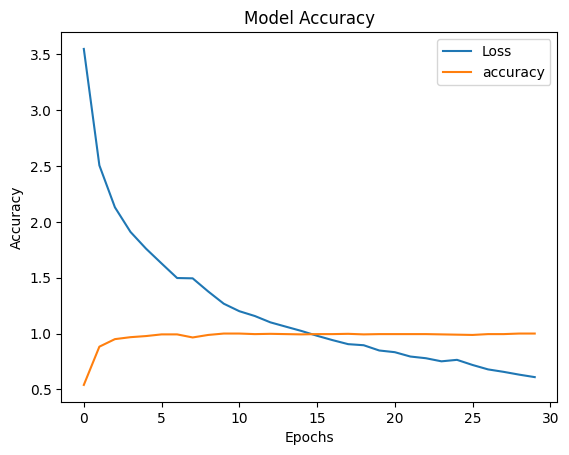

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Loss','accuracy'])
plt.show()

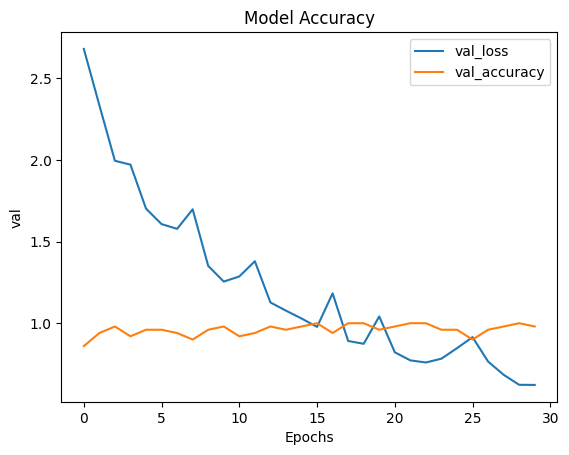

In [39]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('val')
plt.xlabel('Epochs')
plt.legend(['val_loss','val_accuracy'])
plt.show()

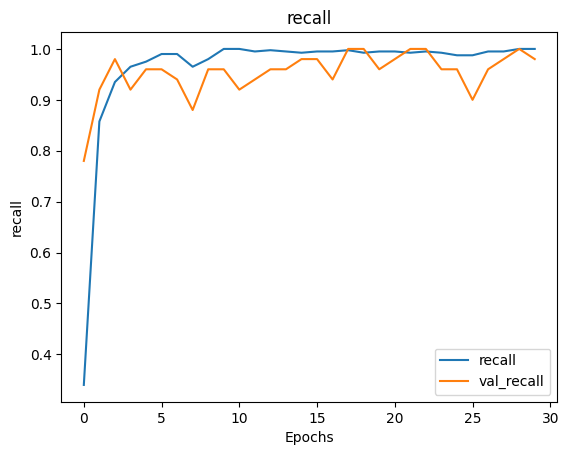

In [40]:
plt.plot(history.history['recall_7'])
plt.plot(history.history['val_recall_7'])
plt.title('recall')
plt.ylabel('recall')
plt.xlabel('Epochs')
plt.legend(['recall','val_recall'])
plt.show()

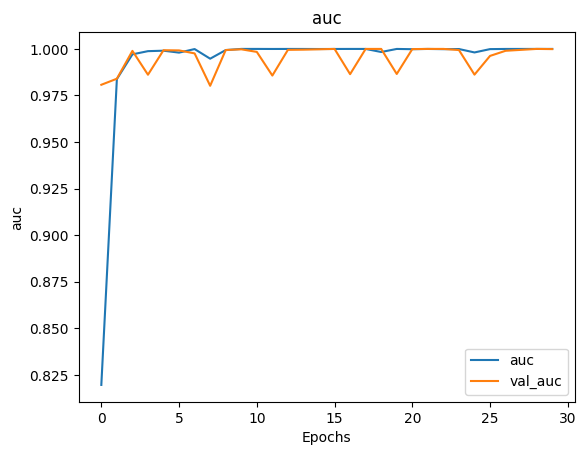

In [42]:
plt.plot(history.history['auc_7'])
plt.plot(history.history['val_auc_7'])
plt.title('auc')
plt.ylabel('auc')
plt.xlabel('Epochs')
plt.legend(['auc','val_auc'])
plt.show()

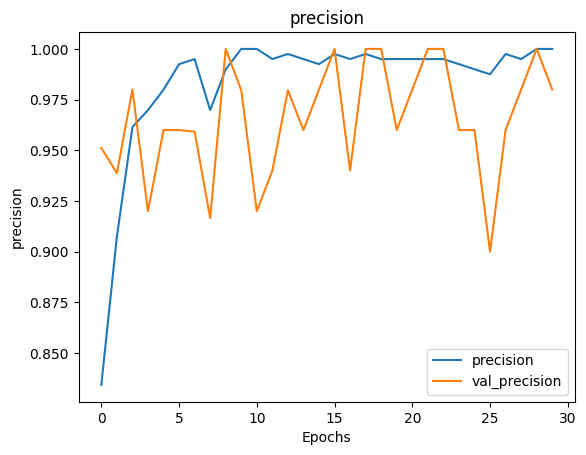

In [44]:
plt.plot(history.history['precision_8'])
plt.plot(history.history['val_precision_8'])
plt.title('precision')
plt.ylabel('precision')
plt.xlabel('Epochs')
plt.legend(['precision','val_precision'])
plt.show()

In [45]:
import numpy as np
import h5py
model.save('model_with_classes.h5')

# Save class names as custom metadata
with h5py.File('model_with_classes.h5', 'a') as f:
    # Store the class names as a dataset within the model file
    f.create_dataset('class_names', data=np.array(category_names, dtype='S'))


In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
img_path = '../data2/foo/main_data_test2/test/plirs/Untitled.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224,224))  # Ensure the size matches what the model expects

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Rescale the image (if your model was trained on rescaled images)
img_array /= 256.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(f'Predicted class: {category_names[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted class: hammer


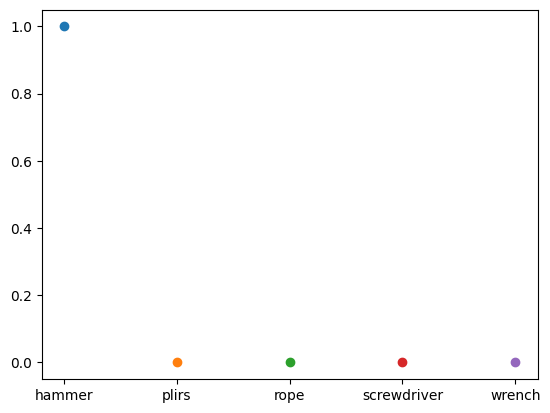

In [108]:
x = category_names
y = prediction
for i in range(len(category_names)):
       plt.scatter(x[i],y[0][i])